In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Read data

In [2]:
df = pd.read_csv("/Users/mireiafrt/Desktop/MASTER/mthesis-deep-lesion/data/DL_info.csv")
df

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test
0,000001_01_01_109.png,1,1,1,109,"233.537, 95.0204, 234.057, 106.977, 231.169, 1...","226.169, 90.0204, 241.252, 111.977","11.9677, 5.10387","0.44666, 0.283794, 0.434454",3,0,"103, 115","0.488281, 0.488281, 5","512, 512","-175, 275",F,62.0,3
1,000001_02_01_014.png,1,2,1,14,"224.826, 289.296, 224.016, 305.294, 222.396, 2...","217.396, 284.296, 233.978, 310.294","16.019, 6.61971","0.431015, 0.485238, 0.340745",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
2,000001_02_01_017.png,1,2,1,17,"272.323, 320.763, 246.522, 263.371, 234.412, 3...","229.412, 258.371, 285.221, 325.763","62.9245, 48.9929","0.492691, 0.503106, 0.351754",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
3,000001_03_01_088.png,1,3,1,88,"257.759, 157.618, 260.018, 133.524, 251.735, 1...","246.735, 128.524, 270.288, 162.618","24.1998, 13.6123","0.498999, 0.278924, 0.452792",3,0,"58, 118","0.732422, 0.732422, 1","512, 512","-175, 275",F,73.0,3
4,000001_04_01_017.png,1,4,1,17,"304.019, 230.585, 292.217, 211.789, 304.456, 2...","287.217, 206.789, 309.456, 235.585","22.1937, 9.8065","0.572678, 0.42336, 0.445674",3,0,"11, 23","0.666016, 0.666016, 5","512, 512","-175, 275",F,73.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,004458_01_01_059.png,4458,1,1,59,"395.737, 284.142, 385.026, 310.221, 402.198, 3...","376.707, 279.142, 407.198, 315.221","28.1937, 22.1522","0.862386, 0.522347, 0.623233",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1
32731,004458_01_01_049.png,4458,1,1,49,"411.677, 296.13, 380.941, 321.278, 404.527, 32...","375.941, 291.13, 416.677, 328.028","39.7138, 30.688","0.845748, 0.557232, 0.570726",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1
32732,004458_01_01_047.png,4458,1,1,47,"204.055, 307.341, 170.022, 316.047, 180.311, 3...","165.022, 297.592, 209.055, 329.357","35.1289, 22.4662","0.339313, 0.588705, 0.56127",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1
32733,004458_01_01_102.png,4458,1,1,102,"276.457, 361.216, 220.572, 354.23, 247.117, 35...","215.572, 347.367, 281.457, 373.201","56.3199, 15.9573","0.477197, 0.730823, 0.813426",-1,0,"96, 108","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1


## Data sanity check

In [12]:
# Define the root path
root_path = "/Volumes/MIREIA/MTHESIS - DEEPLESION/DATA/Images_png/Images_png"

# Create a new column with the data path and the file name, replacing the last underscore with /
df['data_path'] = df['File_name'].apply(lambda x: os.path.join(root_path, x.rsplit('_', 1)[0] + '/' + x.rsplit('_', 1)[1]))
df['data_path'].iloc[0]

'/Volumes/MIREIA/MTHESIS - DEEPLESION/DATA/Images_png/Images_png/000001_01_01/109.png'

In [13]:
# Check if all files exist
missing_files = []
for file_path in df['data_path']:
    if not os.path.isfile(file_path):
        missing_files.append(file_path)

if missing_files:
    print("Error: The following files are missing:")
    for file in missing_files:
        print(file)
else:
    print("Everything is correct.")

Everything is correct.


# EDA

In [3]:
df[df['Train_Val_Test']==1]['Coarse_lesion_type'].value_counts()

Coarse_lesion_type
-1    22919
Name: count, dtype: int64

In [4]:
df['Train_Val_Test'].value_counts(normalize=True)

Train_Val_Test
1    0.700137
3    0.150512
2    0.149351
Name: proportion, dtype: float64

In [5]:
df['Patient_index'].nunique()

4427

In [6]:
df['Coarse_lesion_type'].value_counts()

Coarse_lesion_type
-1    22919
 5     2394
 2     2176
 3     1672
 4     1284
 8      867
 7      681
 6      495
 1      247
Name: count, dtype: int64

In [7]:
df['Patient_sex'].isna().sum()

np.int64(0)

In [8]:
df['Patient_age'].isna().sum()

np.int64(1)

In [9]:
df[df['Patient_age'].isna()]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test
47,000014_01_01_104.png,14,1,1,104,"189.13, 216.51, 158.065, 204.926, 170.702, 222...","153.065, 190.449, 194.13, 227.302","33.1548, 28.4766","0.332115, 0.23606, 0.853308",7,0,"98, 110","0.703125, 0.703125, 5","512, 512","-175, 275",F,NaN,2


In [10]:
df[df['Patient_index']==14]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test
47,000014_01_01_104.png,14,1,1,104,"189.13, 216.51, 158.065, 204.926, 170.702, 222...","153.065, 190.449, 194.13, 227.302","33.1548, 28.4766","0.332115, 0.23606, 0.853308",7,0,"98, 110","0.703125, 0.703125, 5","512, 512","-175, 275",F,NaN,2
48,000014_02_01_108.png,14,2,1,108,"190.71, 140.163, 162.277, 126.473, 172.281, 13...","157.277, 113.575, 195.71, 145.163","31.5568, 20.6492","0.335091, 0.241617, 0.836525",7,0,"95, 114","0.703125, 0.703125, 5","512, 512","-175, 275",F,24.0,2
49,000014_02_01_101.png,14,2,1,101,"313.287, 209.902, 266.294, 243.469, 307.021, 2...","261.294, 199.979, 318.287, 249.811","57.7499, 48.2901","0.556014, 0.469646, 0.790311",8,0,"95, 114","0.703125, 0.703125, 5","512, 512","-175, 275",F,24.0,2


In [11]:
df['Patient_age'] = df.groupby('Patient_index')['Patient_age'].transform(lambda x: x.fillna(x.mean()))
df[df['Patient_age'].isna()]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test


In [12]:
bins = [0, 20, 40, 60, 80, float('inf')]  # Adjusting bin edges to include 'over 80'
labels = ['Under 20', '20-40', '40-60', '60-80', 'Over 80']  # Corresponding labels
df['age_group'] = pd.cut(df['Patient_age'], bins=bins, labels=labels, right=False)
# all groups have pretty euqal M-F distribution except for over 80 (mostly males)
df[['Patient_sex', 'age_group']].value_counts(normalize=True)

Patient_sex  age_group
M            60-80        0.240507
             40-60        0.189705
F            40-60        0.185490
             60-80        0.159279
M            20-40        0.088193
F            20-40        0.079212
M            Under 20     0.023675
F            Under 20     0.018115
M            Over 80      0.012403
F            Over 80      0.003421
Name: proportion, dtype: float64

In [13]:
df['Patient_sex'].value_counts(normalize=True)

Patient_sex
M    0.554483
F    0.445517
Name: proportion, dtype: float64

In [14]:
# considering under20, over80, and 20-40 for both F and M
count  = 0.003421+0.012403+0.018115+0.023675+0.079212+0.088193
count*100

22.5019

In [15]:
22.5019*0.71

15.976348999999999

# Data splits

- Study = different examinations (like different purposes or follow-ups)
- Series = 3D volume. Each study can have multiple series (scanned same time point, but different contrast phases, image filters, etc.)
- Slices = a whole set of axial image slices form the 3D study volume.

We have to consider each patient-study-series as a volume and single sample, but when splitting, we want to make it so that no patient is shared through multiple sets.

My thoughts are:
- Ground truth: Should only contain "Minorities", which in this case we could consider to be both M and F of under20 and over80? Maybe even M and F of 20-40
    - for these age groups, take 70% for the ground truth (GT will be 15.75% ~16% of whole dataset) and the other 30% to be left to split between test-train-val
-Remaining 84.25 (~84%): split data stratified in regards to age group and gender
    - Test: 60% of the data (50.55% of whole dataset ~51%)
    - Train: 30% of the data (25.28% of whole dataset ~25%)
    - Val: 10% of the whole dataset (8.43% of whole dataset ~8%)

Final results: 
    - GT: 16%
    - Test: 51%
    - Train: 25%
    - Val: 8%

In [16]:
def is_minority(row):
    return row['age_group'] in ['Under 20', '20-40', 'Over 80']

# Custom function to apply per patient
def extract_patient_info(patient_df):
    # Get mode age_group with fallback
    age_group_mode = patient_df['age_group'].mode()
    age_group_final = age_group_mode.iloc[0] if len(age_group_mode) == 1 else patient_df.iloc[0]['age_group']
    
    # Get mode gender with fallback
    sex_mode = patient_df['Patient_sex'].mode()
    sex_final = sex_mode.iloc[0] if len(sex_mode) == 1 else patient_df.iloc[0]['Patient_sex']
    
    return pd.Series({
        'Patient_sex': sex_final,
        'age_group': age_group_final
    })


# Get unique patients with their age/gender info, apply this function per patient on the age_group
patient_info = df.groupby('Patient_index').apply(extract_patient_info).reset_index()
#patient_info = df.groupby('Patient_index').first().reset_index()
patient_info['is_minority'] = patient_info.apply(is_minority, axis=1)

# Step 1: Split minority patients → Ground Truth (70%) and remaining (30%) → results in 16% of patients
minority_patients = patient_info[patient_info['is_minority']]
majority_patients = patient_info[~patient_info['is_minority']]
gt_patients, minority_remain = train_test_split(minority_patients,
    train_size=0.70, test_size=0.30,
    stratify=minority_patients[['Patient_sex', 'age_group']],
    random_state=42
)

# Step 2: Combine remaining minority + majority → Remaining 84% of patients
remaining_patients = pd.concat([minority_remain, majority_patients])

# Step 3: Split remaining into test (60%), train (30%), val (10%)
temp_train_val, test_patients= train_test_split(remaining_patients,
    train_size=0.40, test_size=0.60,
    stratify=remaining_patients[['Patient_sex', 'age_group']],
    random_state=42
)
train_patients, val_patients = train_test_split(temp_train_val,
    test_size=0.25,  # 0.25 of 40% = 10%
    stratify=temp_train_val[['Patient_sex', 'age_group']],
    random_state=42
)

# Step 4: Assign split labels
def assign_split(df, split_name):
    df = df[['Patient_index']].copy()
    df['split'] = split_name
    return df

split_assignments = pd.concat([
    assign_split(gt_patients, 'ground_truth'),
    assign_split(test_patients, 'test'),
    assign_split(train_patients, 'train'),
    assign_split(val_patients, 'val')
])

# Step 5: Merge back to metadata_df
df = df.merge(split_assignments, on='Patient_index', how='left')
df

/var/folders/b3/cjdnph9s5g171rt5nqc80pyc0000gn/T/ipykernel_80225/3255609058.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  patient_info = df.groupby('Patient_index').apply(extract_patient_info).reset_index()


,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test,age_group,split
0,000001_01_01_109.png,1,1,1,109,"233.537, 95.0204, 234.057, 106.977, 231.169, 1...","226.169, 90.0204, 241.252, 111.977","11.9677, 5.10387","0.44666, 0.283794, 0.434454",3,0,"103, 115","0.488281, 0.488281, 5","512, 512","-175, 275",F,62.0,3,60-80,test
1,000001_02_01_014.png,1,2,1,14,"224.826, 289.296, 224.016, 305.294, 222.396, 2...","217.396, 284.296, 233.978, 310.294","16.019, 6.61971","0.431015, 0.485238, 0.340745",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3,60-80,test
2,000001_02_01_017.png,1,2,1,17,"272.323, 320.763, 246.522, 263.371, 234.412, 3...","229.412, 258.371, 285.221, 325.763","62.9245, 48.9929","0.492691, 0.503106, 0.351754",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3,60-80,test
3,000001_03_01_088.png,1,3,1,88,"257.759, 157.618, 260.018, 133.524, 251.735, 1...","246.735, 128.524, 270.288, 162.618","24.1998, 13.6123","0.498999, 0.278924, 0.452792",3,0,"58, 118","0.732422, 0.732422, 1","512, 512","-175, 275",F,73.0,3,60-80,test
4,000001_04_01_017.png,1,4,1,17,"304.019, 230.585, 292.217, 211.789, 304.456, 2...","287.217, 206.789, 309.456, 235.585","22.1937, 9.8065","0.572678, 0.42336, 0.445674",3,0,"11, 23","0.666016, 0.666016, 5","512, 512","-175, 275",F,73.0,3,60-80,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,004458_01_01_059.png,4458,1,1,59,"395.737, 284.142, 385.026, 310.221, 402.198, 3...","376.707, 279.142, 407.198, 315.221","28.1937, 22.1522","0.862386, 0.522347, 0.623233",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1,60-80,test
32731,004458_01_01_049.png,4458,1,1,49,"411.677, 296.13, 380.941, 321.278, 404.527, 32...","375.941, 291.13, 416.677, 328.028","39.7138, 30.688","0.845748, 0.557232, 0.570726",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1,60-80,test
32732,004458_01_01_047.png,4458,1,1,47,"204.055, 307.341, 170.022, 316.047, 180.311, 3...","165.022, 297.592, 209.055, 329.357","35.1289, 22.4662","0.339313, 0.588705, 0.56127",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1,60-80,test
32733,004458_01_01_102.png,4458,1,1,102,"276.457, 361.216, 220.572, 354.23, 247.117, 35...","215.572, 347.367, 281.457, 373.201","56.3199, 15.9573","0.477197, 0.730823, 0.813426",-1,0,"96, 108","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1,60-80,test


In [17]:
df['split'].value_counts(normalize=True)

split
test            0.502093
train           0.256667
ground_truth    0.161326
val             0.079914
Name: proportion, dtype: float64

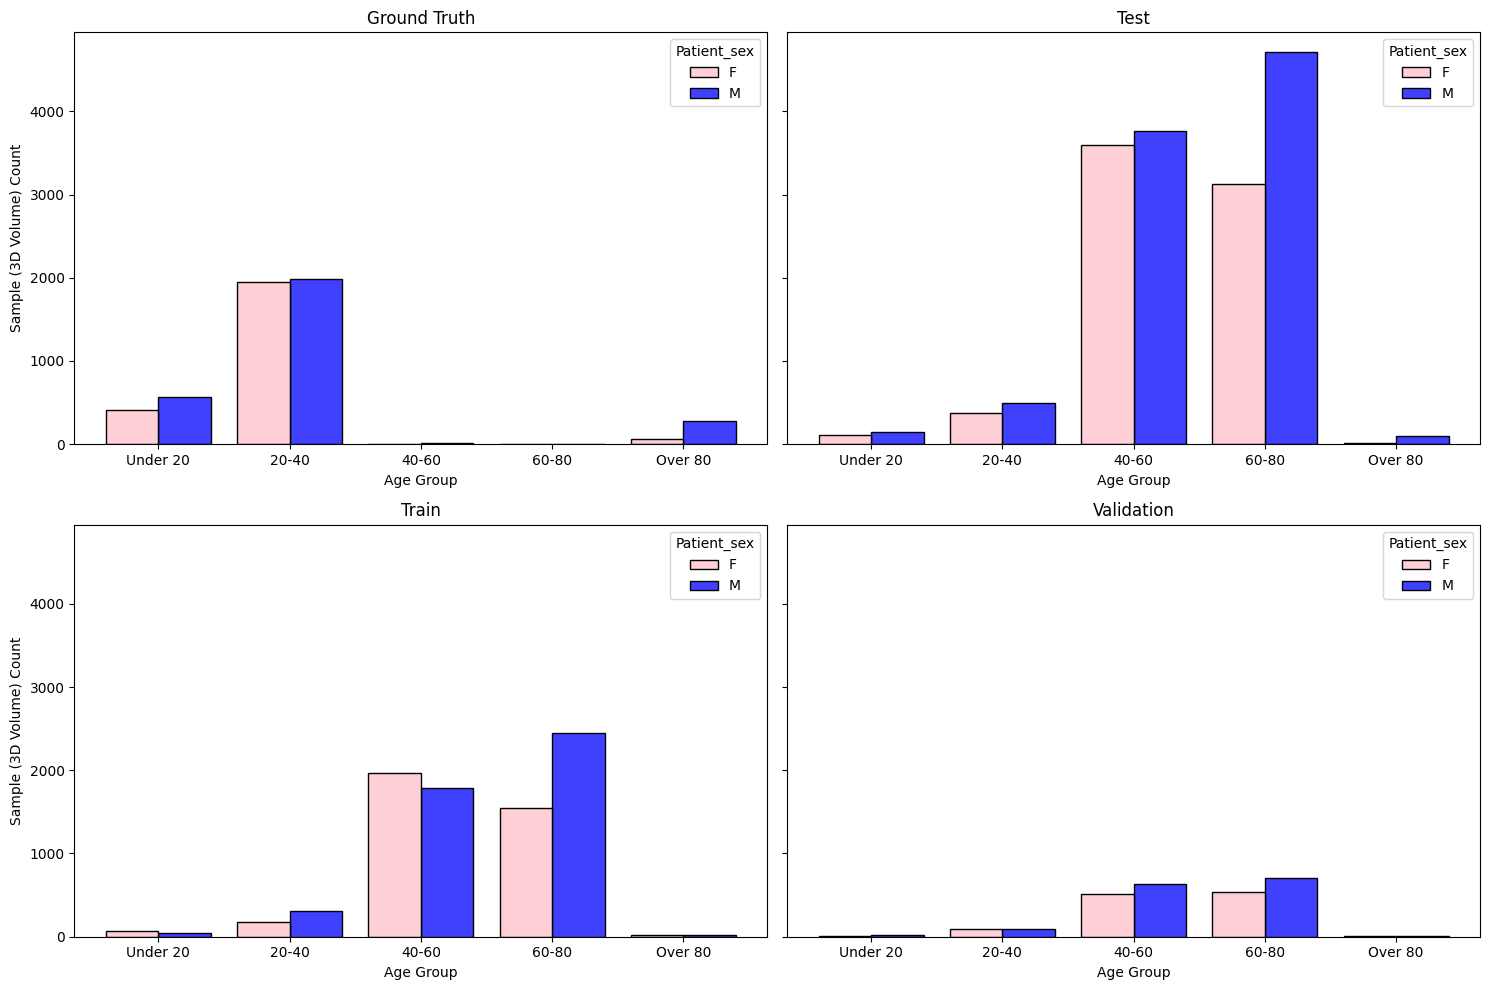

In [18]:
# Ensure Patient_sex and age_group are categorical for consistent ordering
df['age_group'] = pd.Categorical(df['age_group'], categories=['Under 20', '20-40', '40-60', '60-80', 'Over 80'], ordered=True)
df['Patient_sex'] = df['Patient_sex'].astype(str)

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
# Flatten axes array for easy indexing
axes = axes.flatten()
# Define custom color palette
custom_palette = {
    'M': 'blue',
    'F': 'pink'
}

# Define splits and titles
splits = ['ground_truth', 'test', 'train', 'val']
titles = ['Ground Truth', 'Test', 'Train', 'Validation']

# Plot histograms
for i, split in enumerate(splits):
    ax = axes[i]
    sns.histplot(
        data=df[df['split'] == split],
        x='age_group',
        hue='Patient_sex',
        multiple='dodge',
        shrink=0.8,
        palette=custom_palette,
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Sample (3D Volume) Count')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [23]:
df[(df['split']=='ground_truth')&(df['age_group']=='60-80')]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test,age_group,split
92,000024_02_01_073.png,24,2,1,73,"262.265, 179.086, 253.729, 174.188, 260.806, 1...","248.729, 168.428, 267.265, 184.166","9.84158, 6.57859","0.492385, 0.412114, 0.642253",-1,0,"52, 88","0.976562, 0.976562, 2","512, 512","-175, 275",F,63.0,1,60-80,ground_truth
93,000024_02_01_067.png,24,2,1,67,"229.89, 182.03, 213.483, 174.287, 226.756, 170...","208.483, 165.6, 234.89, 189.611","18.1425, 15.4251","0.423486, 0.410596, 0.628237",-1,0,"52, 88","0.976562, 0.976562, 2","512, 512","-175, 275",F,63.0,1,60-80,ground_truth
667,000085_01_01_068.png,85,1,1,68,"247.941, 205.541, 226.391, 209.045, 230.07, 20...","221.391, 196.862, 252.941, 217.725","21.8331, 11.0322","0.446242, 0.459299, 0.625174",2,0,"62, 74","0.976562, 0.976562, 5","512, 512","-175, 275",M,79.0,3,60-80,ground_truth
5986,000501_03_01_033.png,501,3,1,33,"312.076, 289.389, 271.41, 277.403, 301.375, 27...","266.41, 268.979, 317.076, 302.522","42.3955, 24.5194","0.499699, 0.630251, 0.630423",-1,0,"27, 52","0.820312, 0.820312, 5","512, 512","-175, 275",M,61.0,1,60-80,ground_truth
5987,000501_03_01_046.png,501,3,1,46,"303.476, 222.993, 233.392, 228.419, 269.112, 2...","228.392, 197.646, 308.476, 243.818","70.293, 36.2172","0.449058, 0.455494, 0.67496",-1,0,"27, 52","0.820312, 0.820312, 5","512, 512","-175, 275",M,61.0,1,60-80,ground_truth
5988,000501_03_01_080.png,501,3,1,80,"213.194, 235.025, 195.643, 208.057, 211.053, 2...","190.215, 203.057, 218.194, 240.025","32.176, 20.1235","0.389126, 0.31164, 0.828124",-1,0,"74, 86","0.820312, 0.820312, 5","512, 512","-175, 275",M,61.0,1,60-80,ground_truth
11595,001125_03_01_082.png,1125,3,1,82,"365.213, 144.441, 338.962, 129.633, 353.77, 13...","333.962, 124.633, 370.213, 149.441","30.1388, 13.9102","0.673186, 0.253515, 0.462894",-1,0,"52, 112","0.664062, 0.664062, 1","512, 512","-175, 275",F,69.0,1,60-80,ground_truth
11596,001125_03_02_069.png,1125,3,2,69,"180.108, 272.194, 174.184, 272.194, 176.876, 2...","169.184, 265.04, 185.108, 279.887","5.92369, 4.84665","0.324691, 0.553968, 0.431531",-1,0,"39, 99","0.664062, 0.664062, 1","512, 512","-1500, 500",F,69.0,1,60-80,ground_truth
11597,001125_03_02_140.png,1125,3,2,140,"328.738, 384.744, 322.815, 383.129, 327.123, 3...","317.815, 376.513, 333.738, 391.36","6.14004, 5.02371","0.621894, 0.812524, 0.524339",-1,0,"110, 218","0.664062, 0.664062, 1","512, 512","-1500, 500",F,69.0,1,60-80,ground_truth
11598,001125_03_02_173.png,1125,3,2,173,"320.661, 390.668, 314.198, 400.361, 320.661, 3...","309.198, 385.668, 325.661, 405.361","11.6499, 7.11939","0.602375, 0.840554, 0.549651",-1,0,"110, 218","0.664062, 0.664062, 1","512, 512","-1500, 500",F,69.0,1,60-80,ground_truth


In [24]:
df[df['Patient_index']==24]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test,age_group,split
90,000024_01_01_120.png,24,1,1,120,"241.32, 173.55, 222.885, 172.996, 232.655, 163...","217.885, 158.226, 246.32, 181.684","18.4435, 13.4627","0.403556, 0.376711, 0.63134",-1,0,"96, 156","0.976562, 0.976562, 1.25","512, 512","-160, 240",F,38.0,1,20-40,ground_truth
91,000024_01_01_132.png,24,1,1,132,"272.561, 173.848, 263.325, 173.148, 268.782, 1...","258.325, 164.79, 277.561, 181.227","9.26237, 6.46147","0.494522, 0.389511, 0.65138",-1,0,"96, 156","0.976562, 0.976562, 1.25","512, 512","-160, 240",F,38.0,1,20-40,ground_truth
92,000024_02_01_073.png,24,2,1,73,"262.265, 179.086, 253.729, 174.188, 260.806, 1...","248.729, 168.428, 267.265, 184.166","9.84158, 6.57859","0.492385, 0.412114, 0.642253",-1,0,"52, 88","0.976562, 0.976562, 2","512, 512","-175, 275",F,63.0,1,60-80,ground_truth
93,000024_02_01_067.png,24,2,1,67,"229.89, 182.03, 213.483, 174.287, 226.756, 170...","208.483, 165.6, 234.89, 189.611","18.1425, 15.4251","0.423486, 0.410596, 0.628237",-1,0,"52, 88","0.976562, 0.976562, 2","512, 512","-175, 275",F,63.0,1,60-80,ground_truth


In [21]:
df[(df['split']=='ground_truth')&(df['age_group']=='40-60')]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test,age_group,split
1894,000200_03_01_382.png,200,3,1,382,"162.499, 289.031, 163.764, 269.419, 154.274, 2...","149.274, 264.419, 177.621, 294.031","19.6533, 18.3853","0.247685, 0.577332, 0.683559",-1,0,"352, 412","0.976562, 0.976562, 1","512, 512","-175, 275",F,40.0,1,40-60,ground_truth
4002,000346_03_01_057.png,346,3,1,57,"313.055, 265.113, 282.942, 266.302, 292.848, 2...","277.942, 251, 318.055, 285.565","30.1356, 24.5684","0.555371, 0.554814, 0.603521",2,0,"50, 63","0.837891, 0.837891, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
4003,000346_03_01_056.png,346,3,1,56,"298.836, 245.382, 269.913, 228.541, 288.219, 2...","264.913, 222.076, 303.836, 251.115","33.4698, 21.623","0.52761, 0.469293, 0.596088",2,0,"50, 63","0.837891, 0.837891, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
4004,000346_03_01_093.png,346,3,1,93,"315.24, 234.656, 289.105, 226.815, 303.044, 22...","284.105, 216.153, 320.24, 248.368","27.2862, 22.726","0.542975, 0.422651, 0.735867",8,0,"87, 99","0.837891, 0.837891, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
11071,001060_03_01_112.png,1060,3,1,112,"326.245, 239.142, 337.435, 268.132, 324.72, 25...","319.72, 234.142, 342.435, 273.132","31.0748, 13.0841","0.619702, 0.444714, 0.813085",8,0,"104, 118","0.816406, 0.816406, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
11072,001060_03_01_110.png,1060,3,1,110,"188.414, 219.306, 206.215, 228.461, 194.009, 2...","183.414, 212.781, 211.215, 233.97","20.0173, 12.5823","0.3067, 0.341142, 0.802756",8,0,"104, 118","0.816406, 0.816406, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
21807,002566_05_01_023.png,2566,5,1,23,"247.831, 267.003, 219.456, 269.304, 234.027, 2...","214.456, 248.966, 252.831, 284.273","28.4678, 25.3903","0.454699, 0.456577, 0.434465",3,0,"17, 29","0.703125, 0.703125, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
21808,002566_05_01_063.png,2566,5,1,63,"231.727, 264.703, 198.751, 258.568, 218.69, 25...","193.751, 245.899, 236.727, 281.206","33.5419, 25.7414","0.430748, 0.481589, 0.635202",2,0,"52, 74","0.703125, 0.703125, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
21809,002566_05_01_068.png,2566,5,1,68,"263.936, 277.74, 281.574, 311.483, 292.31, 282...","255.101, 272.74, 297.31, 316.483","38.0748, 36.3442","0.569916, 0.541817, 0.652371",2,0,"52, 74","0.703125, 0.703125, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth
21810,002566_05_01_058.png,2566,5,1,58,"256.267, 227.892, 198.751, 283.108, 209.487, 2...","193.751, 222.892, 261.267, 288.108","79.7302, 64.8472","0.463007, 0.464955, 0.614457",2,0,"52, 74","0.703125, 0.703125, 5","512, 512","-175, 275",M,40.0,2,40-60,ground_truth


In [22]:
df[df['Patient_index']==200]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test,age_group,split
1888,000200_01_01_391.png,200,1,1,391,"187.556, 190.222, 200, 192.889, 192, 200.889, ...","182.556, 185.222, 205, 205.889","12.727, 11.2436","0.353587, 0.437186, 0.702971",-1,0,"313, 421","0.976562, 0.976562, 1","512, 512","-175, 275",F,38.0,1,20-40,ground_truth
1889,000200_01_01_343.png,200,1,1,343,"347.556, 232.889, 336, 224.889, 338.667, 235.5...","331, 219.889, 352.556, 240.556","14.0546, 12.3488","0.679769, 0.525822, 0.654092",-1,0,"313, 421","0.976562, 0.976562, 1","512, 512","-175, 275",F,38.0,1,20-40,ground_truth
1890,000200_01_01_383.png,200,1,1,383,"159.111, 257.778, 160, 242.667, 166.222, 250.6...","147.889, 237.667, 171.222, 262.778","15.1372, 13.4513","0.276229, 0.585632, 0.695817",-1,0,"313, 421","0.976562, 0.976562, 1","512, 512","-175, 275",F,38.0,1,20-40,ground_truth
1891,000200_02_01_356.png,200,2,1,356,"354.869, 203.917, 341.628, 194.207, 346.041, 2...","336.628, 187.441, 359.869, 210.683","16.4203, 15.442","0.690725, 0.502635, 0.663986",-1,0,"326, 426","0.976562, 0.976562, 1","512, 512","-175, 275",F,39.0,1,20-40,ground_truth
1892,000200_02_01_396.png,200,2,1,396,"189.793, 165.959, 203.034, 166.841, 197.738, 1...","184.793, 160.076, 208.034, 178.021","13.2708, 7.99372","0.358945, 0.41964, 0.701819",-1,0,"326, 426","0.976562, 0.976562, 1","512, 512","-175, 275",F,39.0,1,20-40,ground_truth
1893,000200_02_01_388.png,200,2,1,388,"173.021, 224.221, 157.131, 225.103, 165.959, 2...","152.131, 212.159, 178.021, 238.048","15.9141, 15.8897","0.290467, 0.573816, 0.693418",-1,0,"326, 426","0.976562, 0.976562, 1","512, 512","-175, 275",F,39.0,1,20-40,ground_truth
1894,000200_03_01_382.png,200,3,1,382,"162.499, 289.031, 163.764, 269.419, 154.274, 2...","149.274, 264.419, 177.621, 294.031","19.6533, 18.3853","0.247685, 0.577332, 0.683559",-1,0,"352, 412","0.976562, 0.976562, 1","512, 512","-175, 275",F,40.0,1,40-60,ground_truth


In [19]:
a = df.groupby(['Patient_index']).agg({'age_group':'nunique'}).reset_index().rename(columns={'age_group':'num_age_groups'})
a['num_age_groups'].value_counts()

num_age_groups
1    4353
2      74
Name: count, dtype: int64

In [20]:
a[a['num_age_groups']==2]

,Patient_index,num_age_groups
1,2,2
3,4,2
6,7,2
13,15,2
17,20,2
...,...,...
2675,2691,2
2768,2784,2
2887,2903,2
3765,3787,2


In [98]:
df[df['Patient_index']==7]

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_sex,Patient_age,Train_Val_Test,age_group,split
22,000007_01_01_173.png,7,1,1,173,"312.964, 188.882, 312.221, 199.036, 316.927, 1...","302.763, 183.882, 321.927, 204.036","10.1816, 9.19387","0.634206, 0.394456, 0.656572",-1,0,"167, 179","0.625, 0.625, 5","512, 512","-175, 275",M,19.0,1,Under 20,ground_truth
23,000007_02_01_073.png,7,2,1,73,"308.506, 222.119, 301.769, 221.524, 305.534, 2...","296.769, 213.751, 313.506, 228.506","6.76281, 4.77174","0.659349, 0.422289, 0.649855",-1,0,"67, 79","0.78125, 0.78125, 5","512, 512","-175, 275",M,26.0,1,20-40,ground_truth
24,000007_03_01_057.png,7,3,1,57,"313.432, 205.533, 293.88, 199.016, 304.742, 19...","288.88, 190.395, 318.432, 214.154","20.6098, 14.5032","0.557553, 0.398437, 0.64204",-1,0,"37, 72","0.78125, 0.78125, 2","512, 512","-175, 275",M,27.0,1,20-40,ground_truth
25,000007_03_01_052.png,7,3,1,52,"346.019, 259.845, 322.846, 251.879, 338.054, 2...","317.846, 241.086, 351.019, 269.914","24.5038, 19.9093","0.62647, 0.554899, 0.635449",-1,0,"37, 72","0.78125, 0.78125, 2","512, 512","-175, 275",M,27.0,1,20-40,ground_truth
26,000007_03_02_066.png,7,3,2,66,"217.103, 266.47, 216.152, 279.792, 222.589, 27...","206.618, 261.47, 227.589, 284.792","13.3552, 10.9984","0.357659, 0.614378, 0.609465",-1,0,"60, 72","0.78125, 0.78125, 5","512, 512","-175, 275",M,27.0,1,20-40,ground_truth
